# Setup

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import datajoint as dj
import os

dj.config.load('/home/cbroz/wrk/alt/creds/dj_local_conf.json_prod')
dj.conn()

DataJoint connection (connected) cbroz@lmf-db.cin.ucsf.edu:3306

In [6]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="hdmf")
warnings.filterwarnings("ignore", category=UserWarning, module="spikeinterface")
warnings.simplefilter("ignore", category=ResourceWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)


# V0

In [7]:
from spyglass.spikesorting.v0 import spikesorting_burst as v0

v0_key = {
    "nwb_file_name": "eliot20221022_.nwb",
    "sorter": "mountainsort4",
    "session_name": "02_Seq2Session1",
    "curation_id": 1,
}

v0.BurstPairSelection().insert_by_sort_group_ids(**v0_key)
v0.BurstPair().populate()

v0_key = v0.BurstPair().fetch('KEY', limit=1)[0]

Populate called


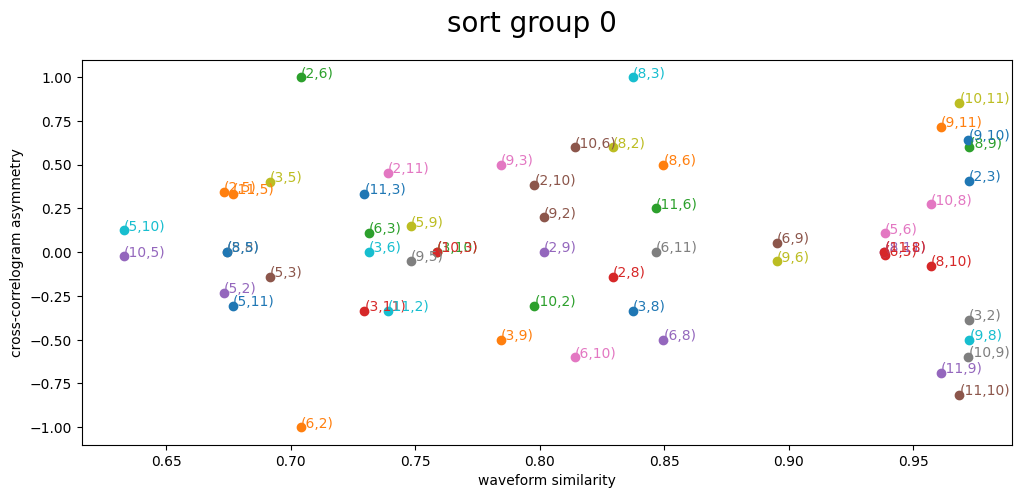

In [8]:
v0.BurstPair().plot_by_sort_group_ids(key=v0_key)

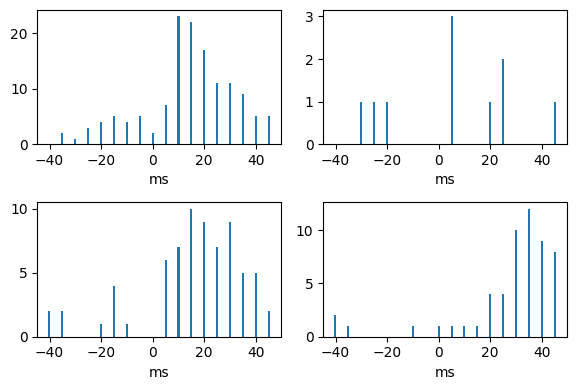

In [9]:
to_investigate_pairs = [
    (9, 10),
    (3, 5),
    (9, 11),
    (10, 11),
]
v0.BurstPair().investigate_pair_xcorrel(v0_key, to_investigate_pairs)

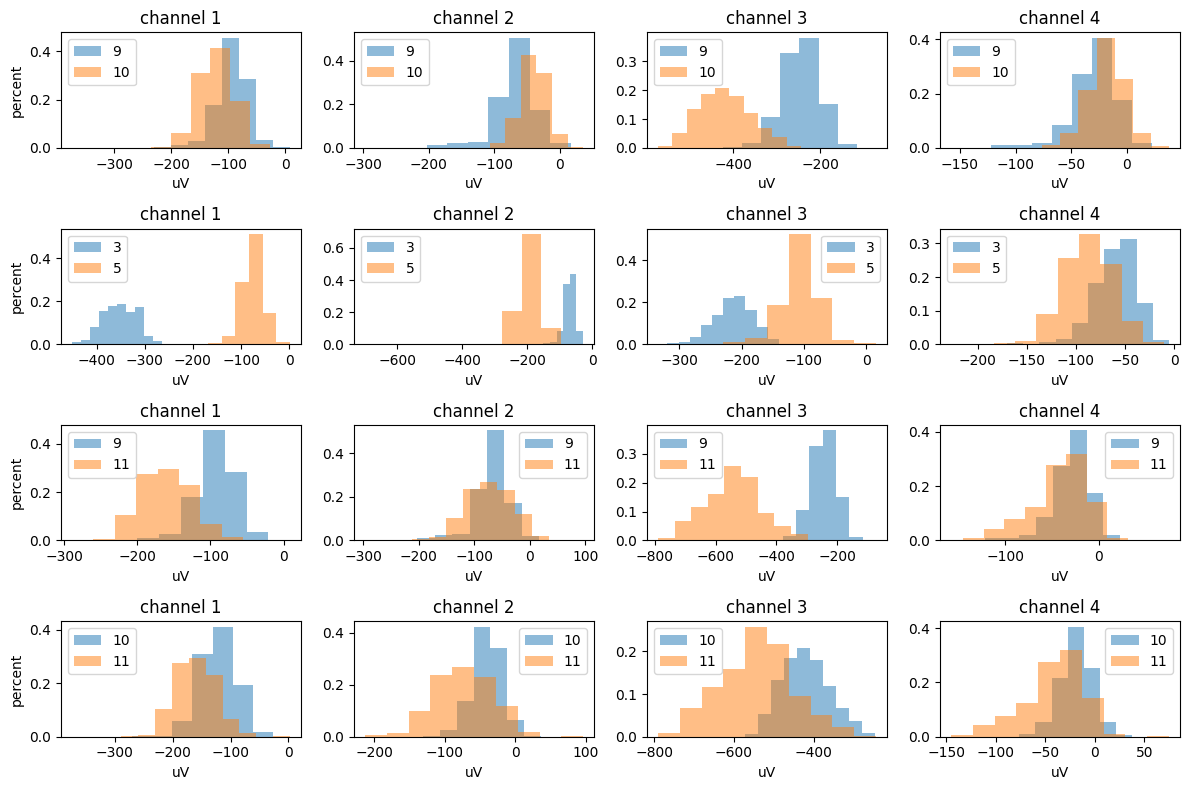

In [10]:
v0.BurstPair().investigate_pair_peaks(v0_key, to_investigate_pairs)

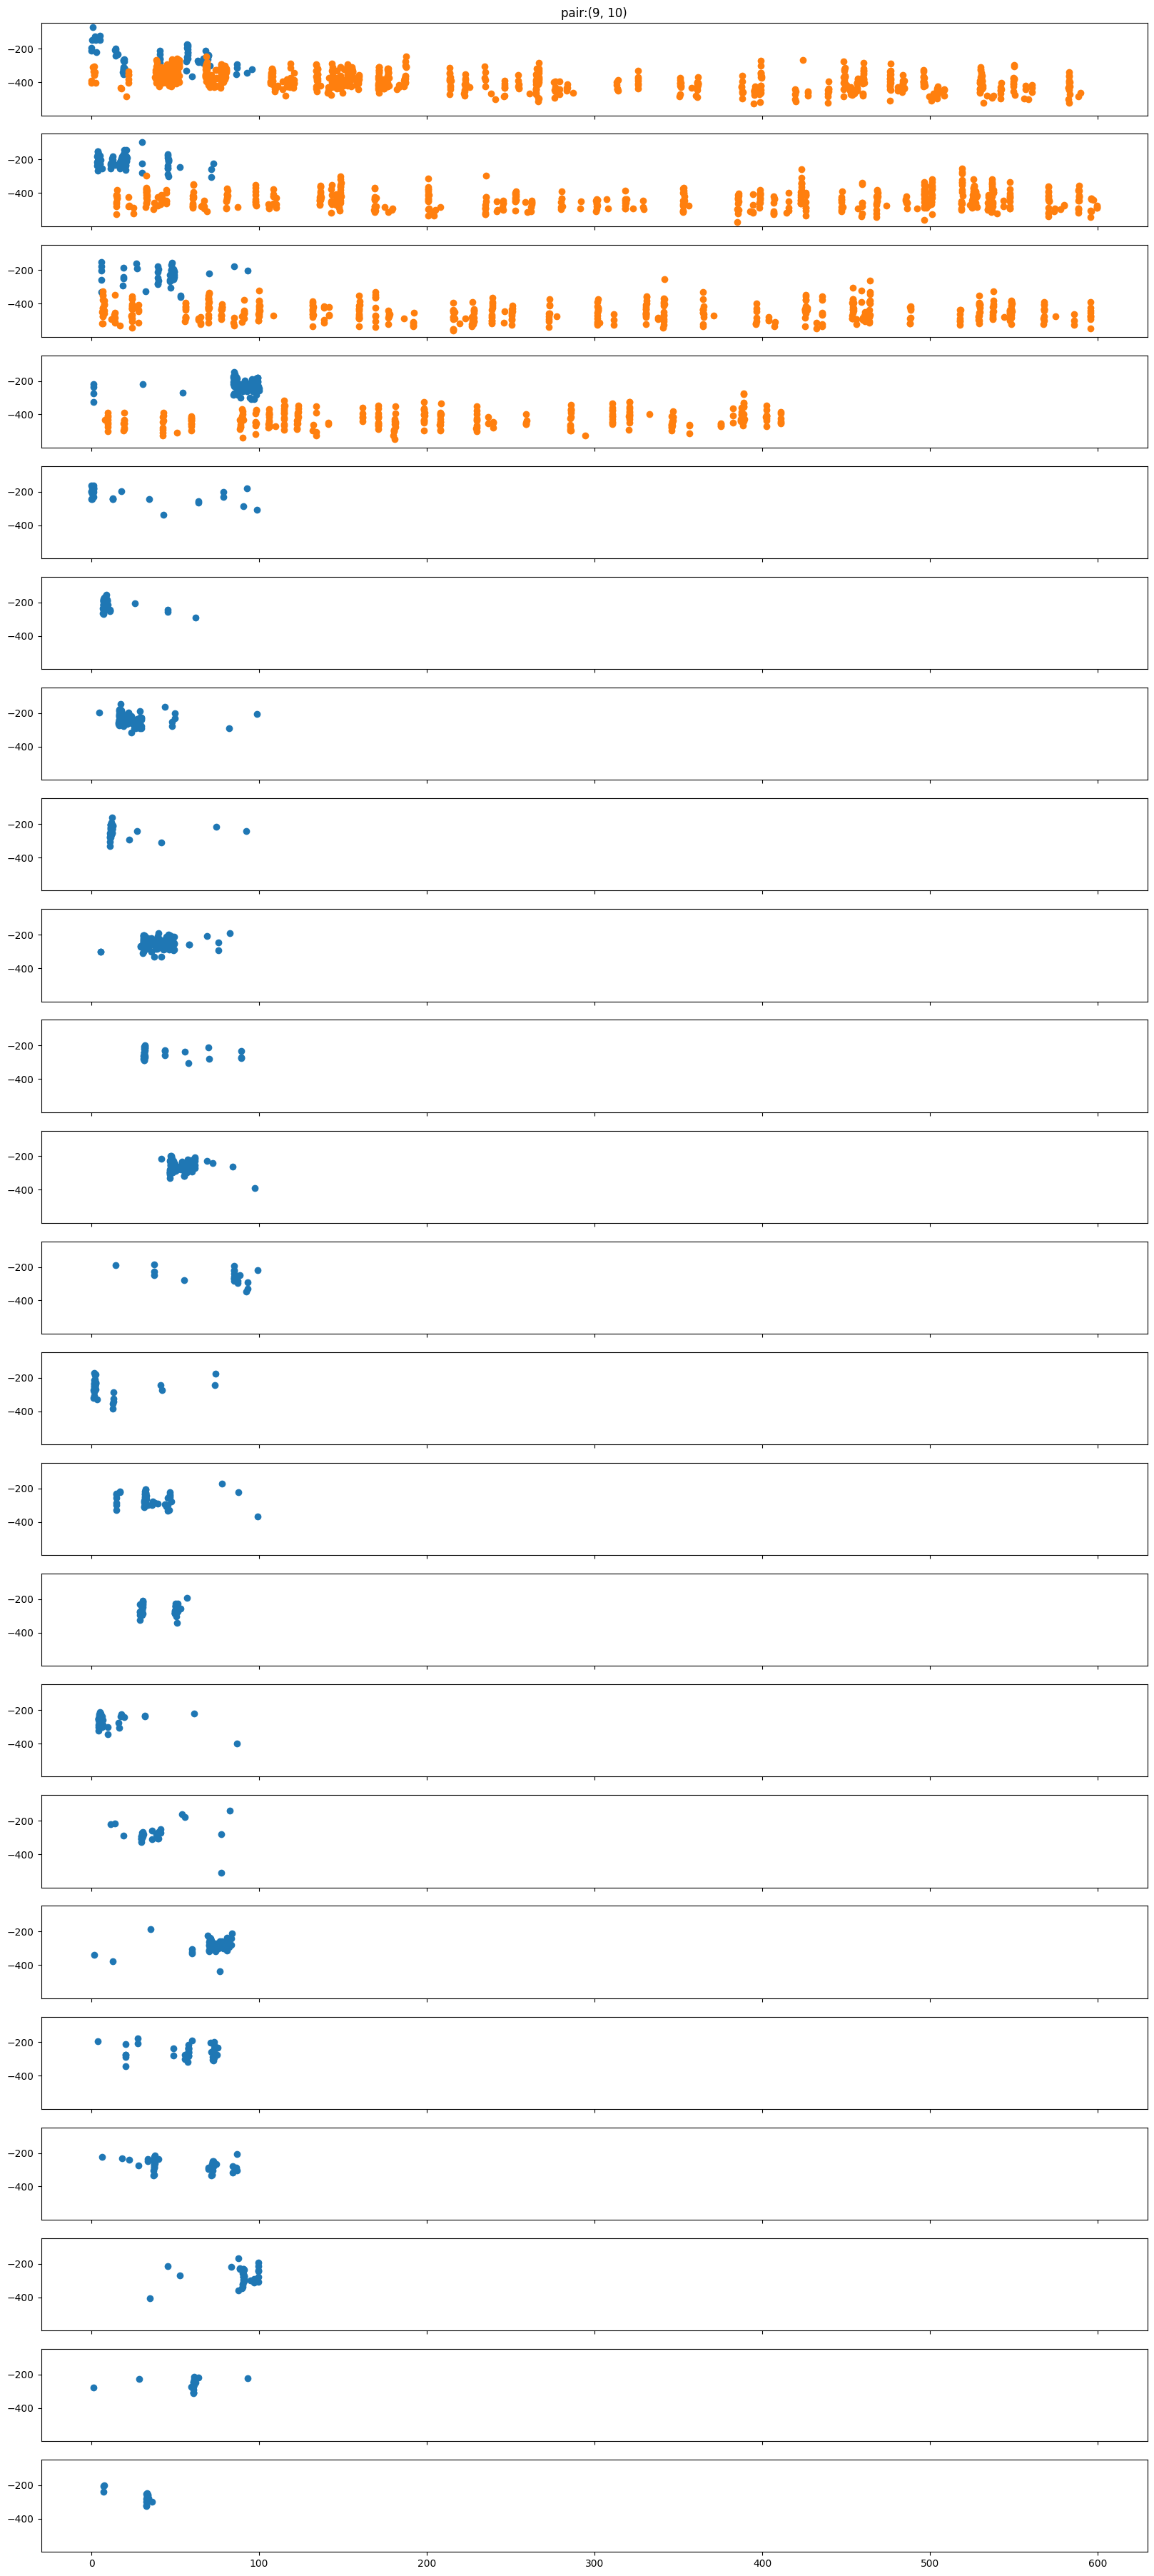

In [11]:
one_pair = [to_investigate_pairs[0]]
v0.BurstPair().plot_peak_over_time(v0_key, one_pair)

# V1

In [12]:
from spyglass.spikesorting.v1 import burst_curation as v1

v1_key = (
    v1.MetricCuration()
    .file_like("eliot2022102")
    .proj()
    .fetch("KEY", limit=1, as_dict=True)
)[0]

v1.BurstPairSelection().insert_by_curation_id(**v1_key)
v1.BurstPair().populate()

v1_key = v1.BurstPair().fetch("KEY", limit=1)[0]


Populate called


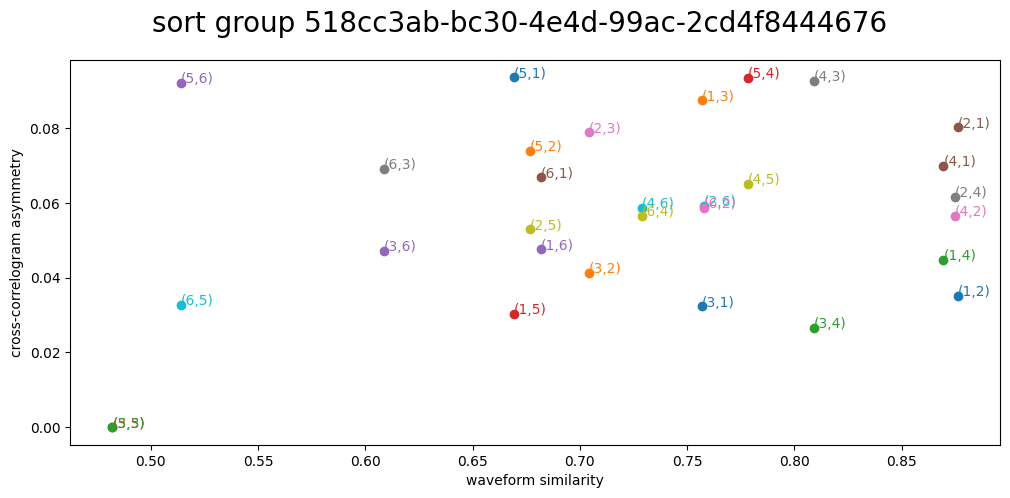

In [13]:
v1.BurstPair().plot_by_sorting_ids(key=v1_key)

[2025-01-14 08:53:43,287][WARNING]: Skipped checksum for file with hash: 2416ac92-2d5b-7553-8042-72c0cd3240c1, and path: /stelmo/nwb/analysis/eliot20221026/eliot20221026_90PAA3OYCG.nwb


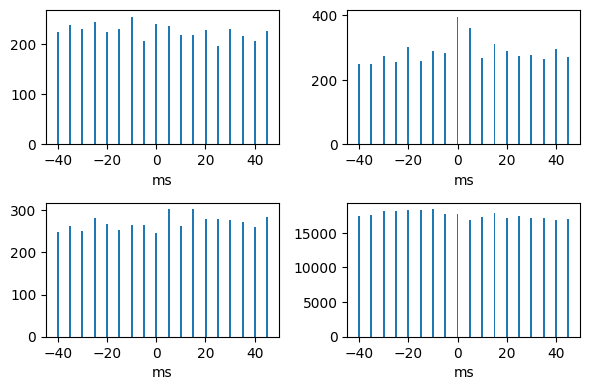

In [14]:
to_investigate_pairs = [
    (6, 5),
    (5, 4),
    (4, 3),
    (1, 2),
]
v1.BurstPair().investigate_pair_xcorrel(v1_key, to_investigate_pairs)

[2025-01-14 08:53:44,273][WARNING]: Skipped checksum for file with hash: 2416ac92-2d5b-7553-8042-72c0cd3240c1, and path: /stelmo/nwb/analysis/eliot20221026/eliot20221026_90PAA3OYCG.nwb


[2025-01-14 08:53:44,579][WARNING]: Skipped checksum for file with hash: 2416ac92-2d5b-7553-8042-72c0cd3240c1, and path: /stelmo/nwb/analysis/eliot20221026/eliot20221026_90PAA3OYCG.nwb


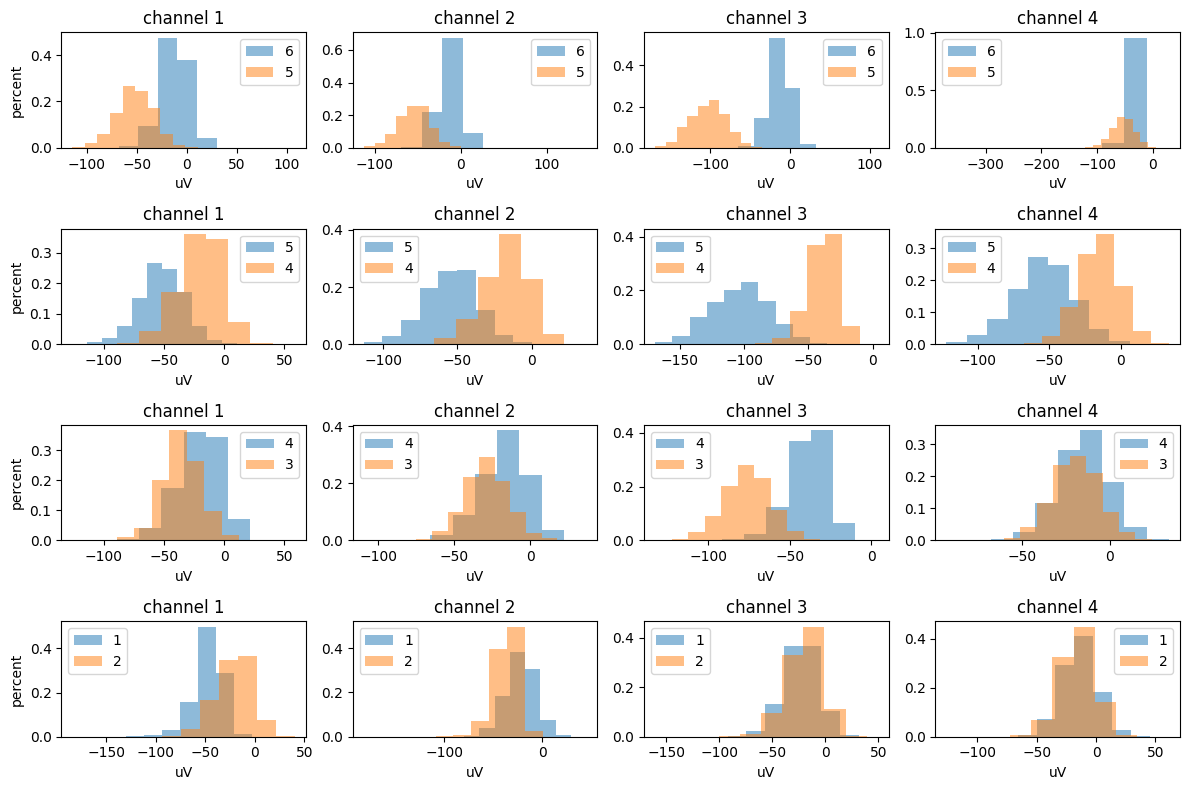

In [15]:
v1.BurstPair().investigate_pair_peaks(v1_key, to_investigate_pairs)

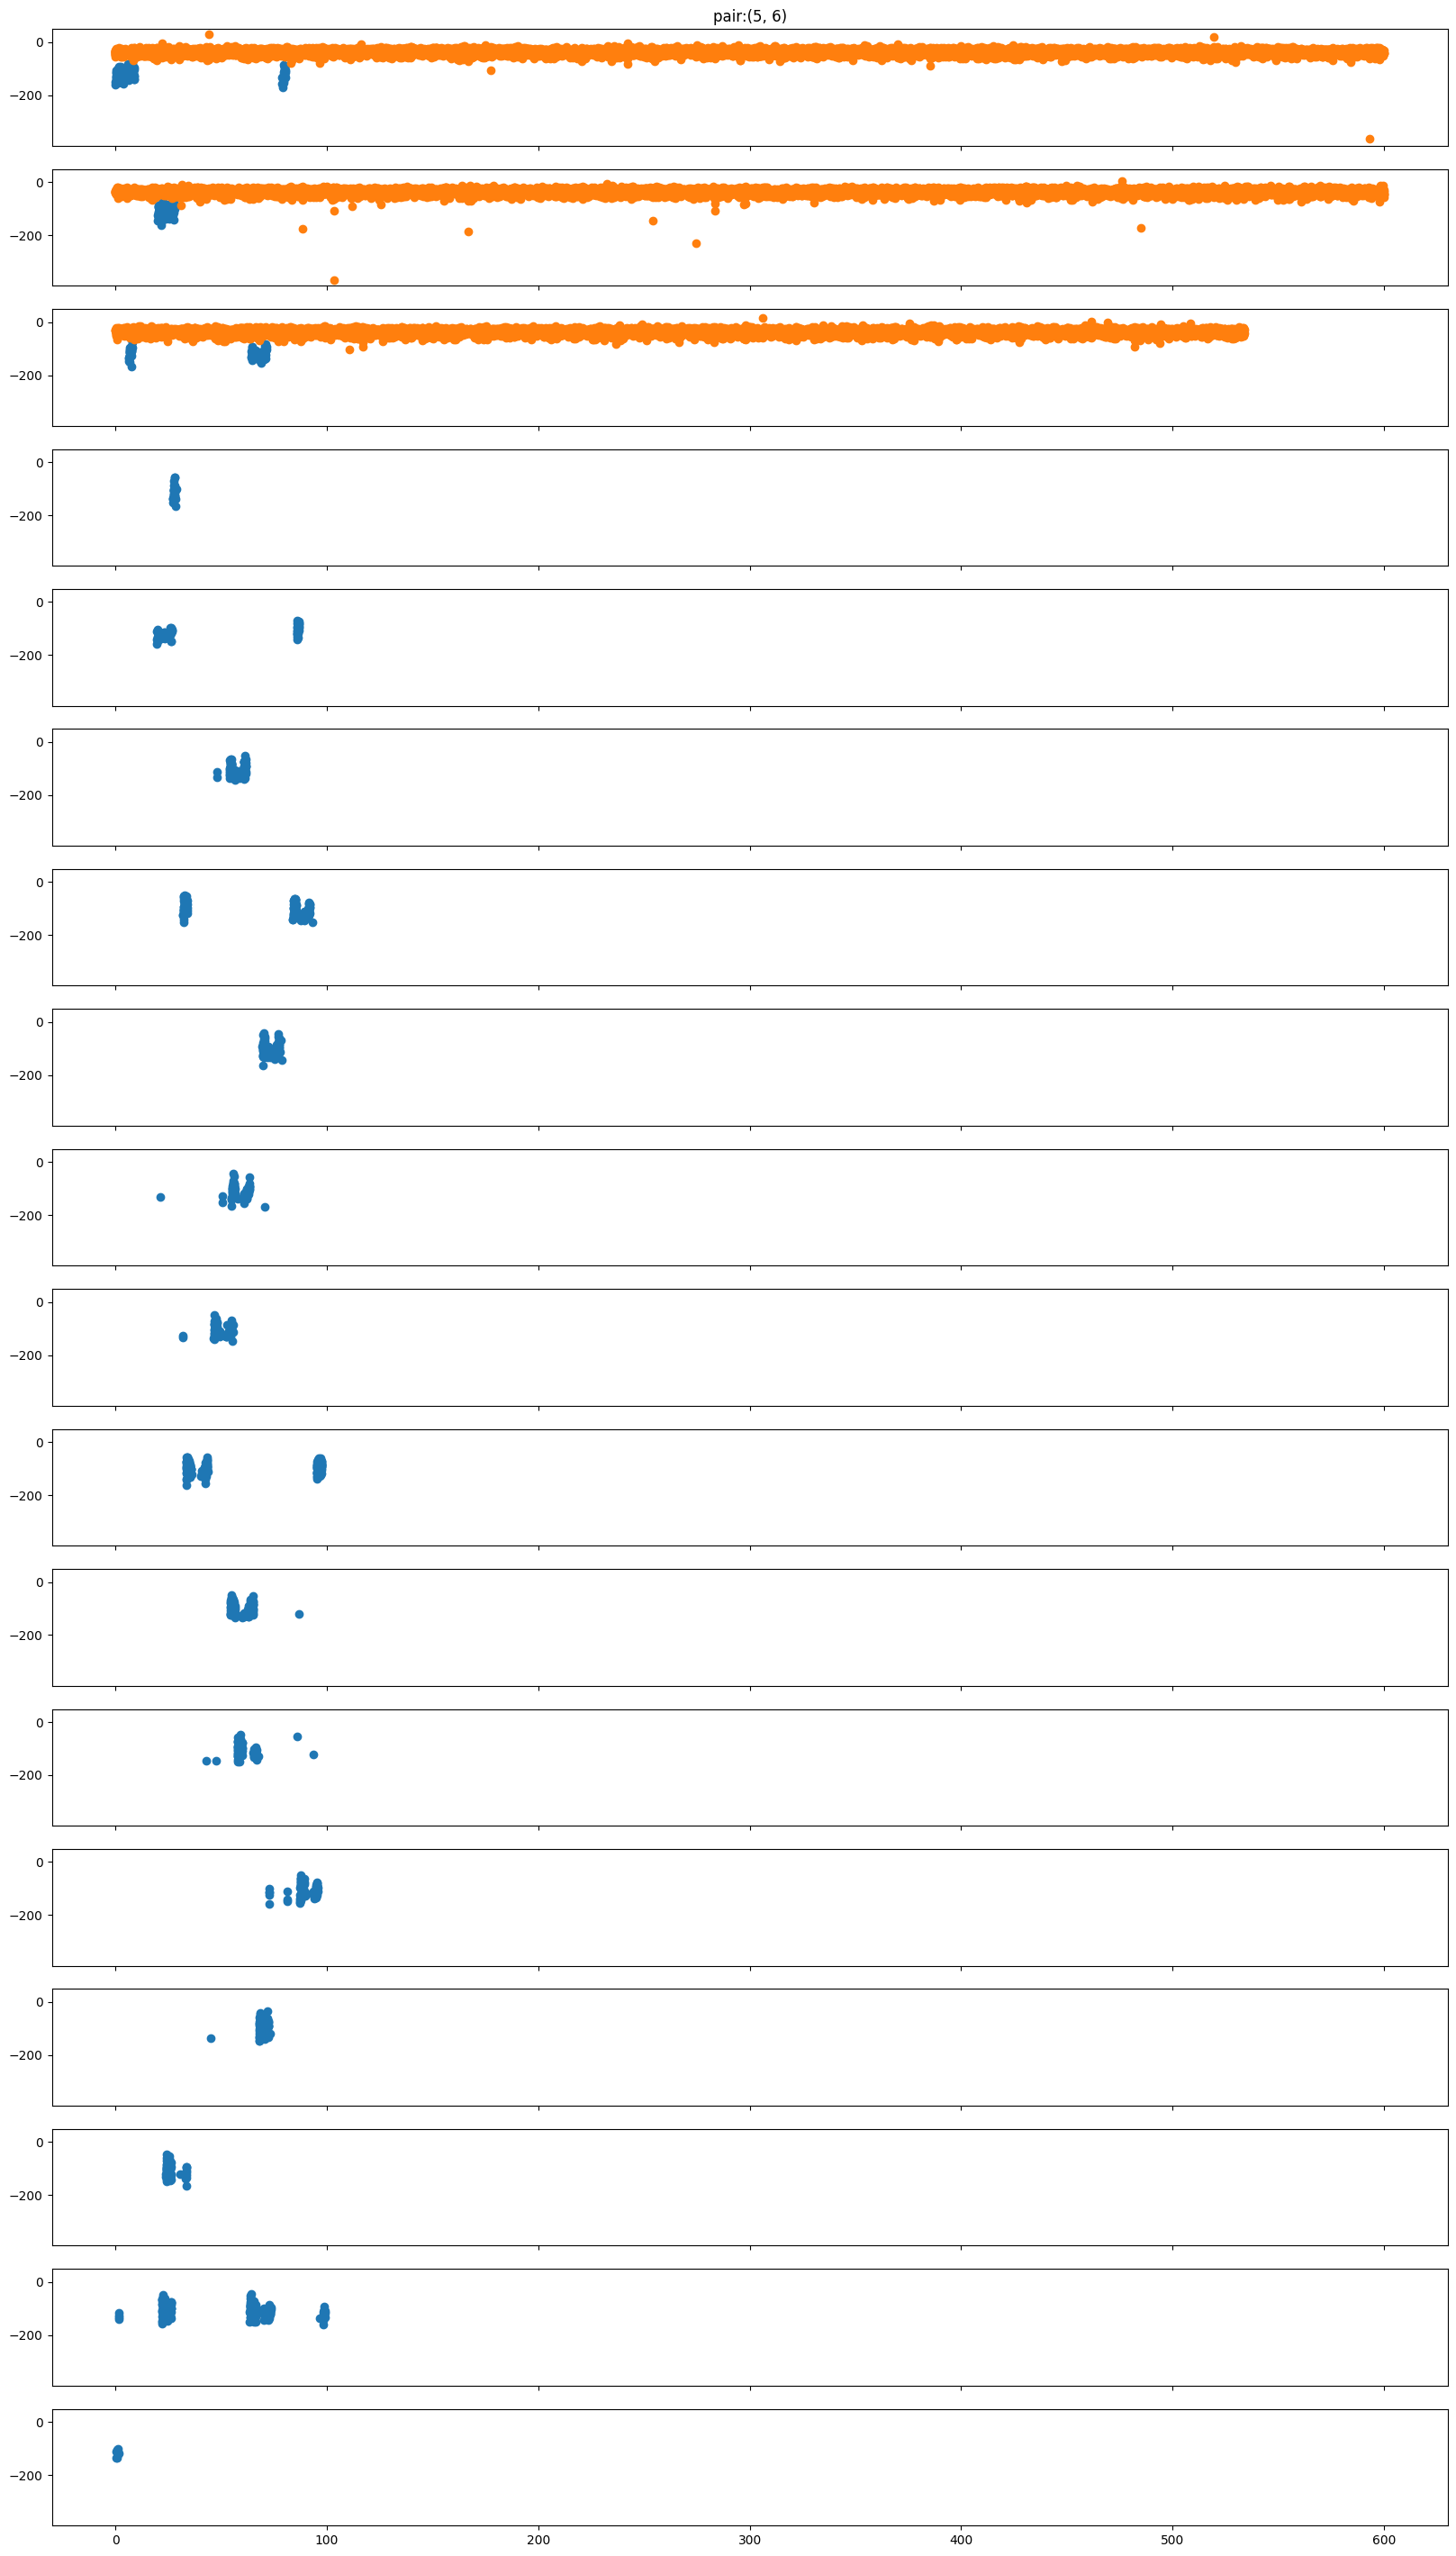

In [16]:
v1.BurstPair().plot_peak_over_time(v1_key, (5,6))